# Part 4: correlations on geographic strata

In our final section, we will use data viz techniques like the original - the goal being to study geographics instead of demographics, which as the original analysis1 states is more abstract - but will lead to key insights as to how we as data scientists analyze minority groups. Ready? Set? Data!

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

sns.set_theme(style="white")
sns.set(font_scale=1.2)
sns.set_palette("copper_r")
plt.rcParams["axes.labelsize"] = 12

CITIES = [
    { "name": "Atlanta", "pos": (-84.791944, -84.001944, 33.478333, 34.0375) },
    { "name": "Austin", "pos": (-98.071667, -97.371111, 30.033889, 30.569722) },
    { "name": "Boston", "pos": (-71.284444, -70.880278, 42.206389, 42.484444) },
    { "name": "Chicago", "pos": (-88.044167, -87.508333, 41.624444, 42.026389) },
    { "name": "Denver", "pos": (-105.104444, -104.625556, 39.578611, 39.920278) },
    { "name": "Houston", "pos": (-95.858333, -95.013056, 29.472778, 30.134167) },
    { "name": "Los Angeles", "pos": (-118.615556, -117.618333, 33.701111, 34.411667) },
    { "name": "Miami", "pos": (-80.2375, -80.145833, 25.734722, 25.812222) },
    { "name": "New York", "pos": (-74.459722, -73.393333, 40.355556, 41.102222) },
    { "name": "New Orleans", "pos": (-90.220833, -89.915833, 29.813056, 30.045556) },
    { "name": "Philadelphia", "pos": (-75.344167, -74.94, 39.846667, 40.146389) },
    { "name": "Portland", "pos": (-122.795278, -122.493333, 45.465556, 45.654444) },
    { "name": "San Francisco", "pos": (-122.521667, -122.352778, 37.690278, 37.812222) },
    { "name": "Seattle", "pos": (-122.473056, -122.151667, 47.493333, 47.718611) },
    { "name": "Washington DC", "pos": (-77.1125, -76.919722, 38.833333, 38.963889) },
]

In [2]:
gb = pd.read_csv("data/pre processed/gaybourhoods-nat.csv"); SS_INDEX_MAX = gb.SS_Index.max(); gb

,Unnamed: 0,SS_Index,TOTINDEX,lat,long,kinsey,percent_democrat,neighbourhood_kinsey
0,0,55.012669,67.077054,34.093828,-118.381697,6,0.456450,1.132075
1,1,58.412517,61.866815,37.758057,-122.435410,6,0.742633,2.533333
2,2,30.731192,37.908747,40.742039,-74.000620,6,0.775215,1.091667
3,3,21.995808,37.530067,40.734012,-74.006746,6,0.794248,1.101695
4,4,21.284224,35.843573,37.773134,-122.411167,5,0.742633,2.533333
...,...,...,...,...,...,...,...,...
2323,2323,0.000000,0.000000,45.528666,-122.678981,0,0.753689,1.708333
2324,2324,0.000000,0.000000,47.606211,-122.333792,0,0.545340,2.148148
2325,2325,0.000000,0.000000,47.449678,-122.307657,0,0.543670,1.357143
2326,2326,0.000000,0.000000,47.604569,-122.335359,0,0.545340,2.148148


In [3]:
pol = pd.read_csv("data/pre processed/election-2012.csv"); pol

,Unnamed: 0,county,lat,long,percent
0,0,Autauga AL,32.532237,-86.646439,0.265878
1,1,Baldwin AL,30.659218,-87.746067,0.215894
2,2,Barbour AL,31.870253,-85.405103,0.513685
3,3,Bibb AL,33.015893,-87.127148,0.261520
4,4,Blount AL,33.977357,-86.566440,0.123719
...,...,...,...,...,...
2879,2879,Sweetwater WY,41.660328,-108.875677,0.282569
2880,2880,Teton WY,44.048662,-110.426087,0.541957
2881,2881,Uinta WY,41.284726,-110.558947,0.190655
2882,2882,Washakie WY,43.878830,-107.669052,0.201318


Now lets summon Nat's last 4 graphs, lightning round again

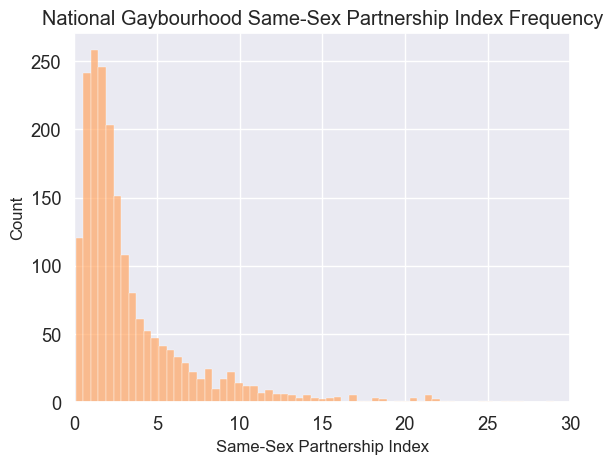

In [4]:
ss_index_hist = sns.histplot(data=gb.query("`SS_Index` != 0"), x="SS_Index")
_ = ss_index_hist.set(title="National Gaybourhood Same-Sex Partnership Index Frequency", xlabel="Same-Sex Partnership Index", xlim=(0,30))

C:\Users\samia\AppData\Local\Temp\ipykernel_20356\2939176375.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  gb_kinsey_bar = sns.barplot(data=gb.groupby("kinsey").aggregate(len).reset_index().drop(0), x="SS_Index", y="kinsey", palette="Pastel2", orient="h")


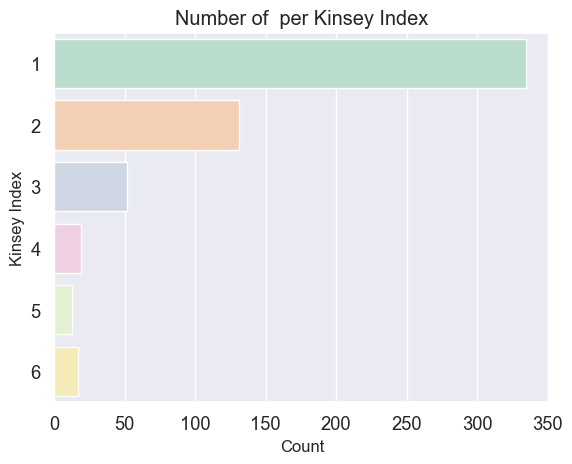

In [5]:
gb_kinsey_bar = sns.barplot(data=gb.groupby("kinsey").aggregate(len).reset_index().drop(0), x="SS_Index", y="kinsey", palette="Pastel2", orient="h")
_ = gb_kinsey_bar.set(title="Number of  per Kinsey Index", ylabel="Kinsey Index", xlabel="Count")

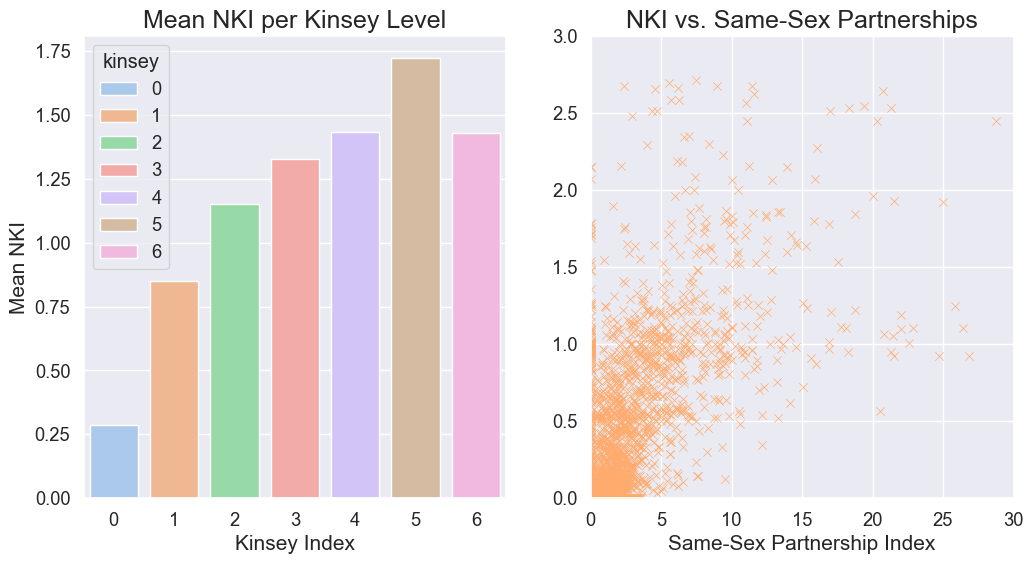

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
mean_kinsey = gb.groupby("kinsey").mean().reset_index()

mean_nk_bar = sns.barplot(data=mean_kinsey, x="kinsey", y="neighbourhood_kinsey", hue="kinsey", palette="pastel", ax=axes[0])
mean_nk_scatter = sns.scatterplot(data=gb, x="SS_Index", y="neighbourhood_kinsey", marker="x", ax=axes[1])

mean_nk_bar.set_title("Mean NKI per Kinsey Level", fontsize=18)
mean_nk_bar.set_xlabel("Kinsey Index", fontsize=15)
mean_nk_bar.set_ylabel("Mean NKI", fontsize=15)

mean_nk_scatter.set(ylabel=None, xlim=(0,30), ylim=(0,3))
mean_nk_scatter.set_xlabel("Same-Sex Partnership Index", fontsize=15)
_=mean_nk_scatter.set_title("NKI vs. Same-Sex Partnerships", fontsize=18)

Hm, for the first 2 lets try a little of the old

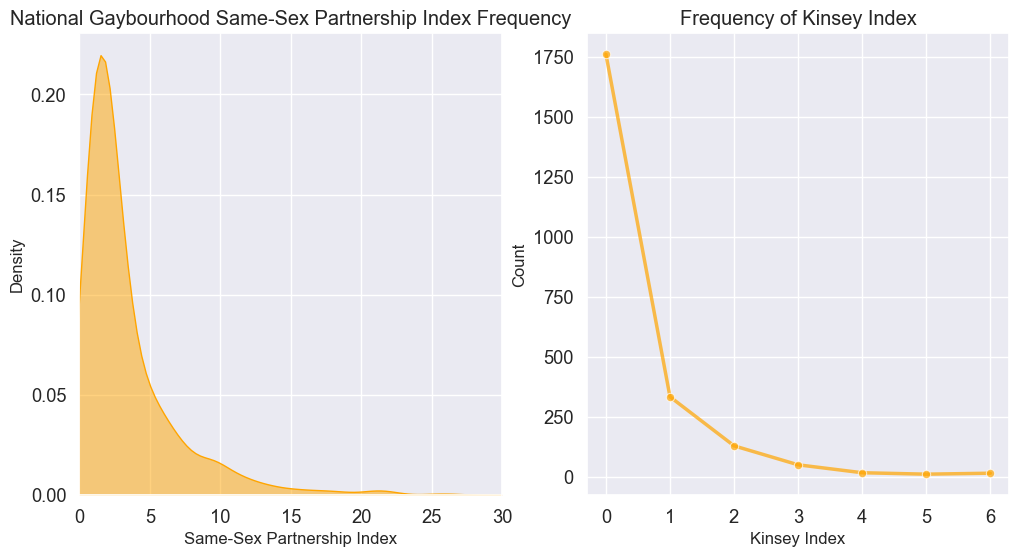

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ss_index_hist = sns.kdeplot(data=gb.query("`SS_Index` != 0"), x="SS_Index", ax=axes[0], color="orange", fill=True, alpha=0.5)
_ = ss_index_hist.set(title="National Gaybourhood Same-Sex Partnership Index Frequency", xlabel="Same-Sex Partnership Index", xlim=(0,30))

gb_kinsey_counts = gb.groupby("kinsey").size().reset_index(name='count') # type: ignore
kinsey_lineplot = sns.lineplot(data=gb_kinsey_counts, x="kinsey", y="count", marker="o", ax=axes[1], color="orange")
_ = kinsey_lineplot.set(title="Frequency of Kinsey Index", ylabel="Count", xlabel="Kinsey Index")
kinsey_lineplot.lines[0].set_alpha(0.7); kinsey_lineplot.lines[0].set_linewidth(2.5)

As for the last 2, the visualization seems fine, but I do wonder

C:\Users\samia\AppData\Local\Temp\ipykernel_20356\582101396.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  combined_plot = sns.barplot(data=combined_data, x="kinsey", y="combined_value", palette="pastel")


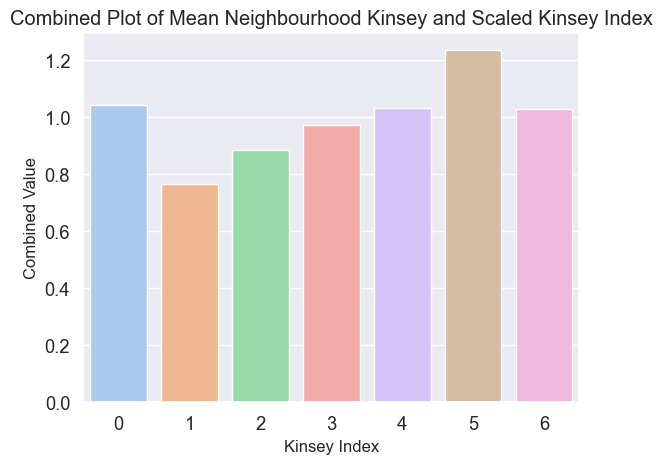

In [8]:
# combined_data = mean_kinsey.copy()
# gb_K = gb.groupby("kinsey").size().reset_index(name='count') # type: ignore

# gb_K['count'] *= 200
# combined_data['neighbourhood_kinsey'] *= 100
# print(gb_K.head(3)); print(combined_data['neighbourhood_kinsey'].head(3))
# combined_data['combined_value'] = combined_data['neighbourhood_kinsey'] + gb_K['count']
# print(gb_K.head(3)); print(combined_data['neighbourhood_kinsey'].head(3))


gb_kinsey_counts = gb.groupby("kinsey").size().reset_index(name='count')
combined_data = pd.merge(mean_kinsey, gb_kinsey_counts, on="kinsey", how="inner")
combined_data['combined_value'] = (1500 * combined_data['neighbourhood_kinsey'] + 1 * combined_data['count']) / 2100

# # ploting time
combined_plot = sns.barplot(data=combined_data, x="kinsey", y="combined_value", palette="pastel")
_ = combined_plot.set(title="Combined Plot of Mean Neighbourhood Kinsey and Scaled Kinsey Index", ylabel="Combined Value", xlabel="Kinsey Index")


Notice how our logic is ```y = ( 1500*kni + 1*Kinsey ) / 2100```, & our results have an error of 1 +/- 0.125 - this tells us Neighborhood kinsey index (KNI) & The Kinsey Index itself are inversely proportional with that much error. This doesn't change our analysis to be honest, I just thought it would be fun to use this tidbit of regression analysis

And now its time to do the analysis itself - time to triangulate each of the GAYBORHOODS once and for all!

In [ ]:
#this code block is courtesy of Nat

color_array = plt.get_cmap('copper_r')(range(256))
color_array[:,-1] = np.array([np.power(x, 1/10) for x in np.arange(0, .5, step=(1/256)*.5)])
copper_alpha = LinearSegmentedColormap.from_list(name='reds_alpha5',colors=color_array)

figure, axes = plt.subplots(5,3, figsize=(15, 30))
figure.suptitle("Concentration of Queer Communities Across the USA", fontsize=20)
figure.subplots_adjust(top=0.95)

# Atlanda
for i, city in enumerate(CITIES):
    ax = axes[(i - i % 3)//3][i % 3]
    sns.kdeplot(
        data=gb[(gb["long"] > city["pos"][0]) & (gb["long"] < city["pos"][1]) & (gb["lat"] > city["pos"][2]) & (gb["lat"] < city["pos"][3])],
        x="long", y="lat", weights="SS_Index", fill=True, cmap=copper_alpha, alpha=.7, ax=ax
    )
    ax.imshow(
        Image.open(f"images/{'-'.join(city['name'].lower().split())}.png").convert("LA"),
        aspect="auto", extent=city["pos"], alpha=.5
    )
    ax.set_title(city["name"], fontsize=18)
    
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_xlabel(None)
    ax.set_ylabel(None)

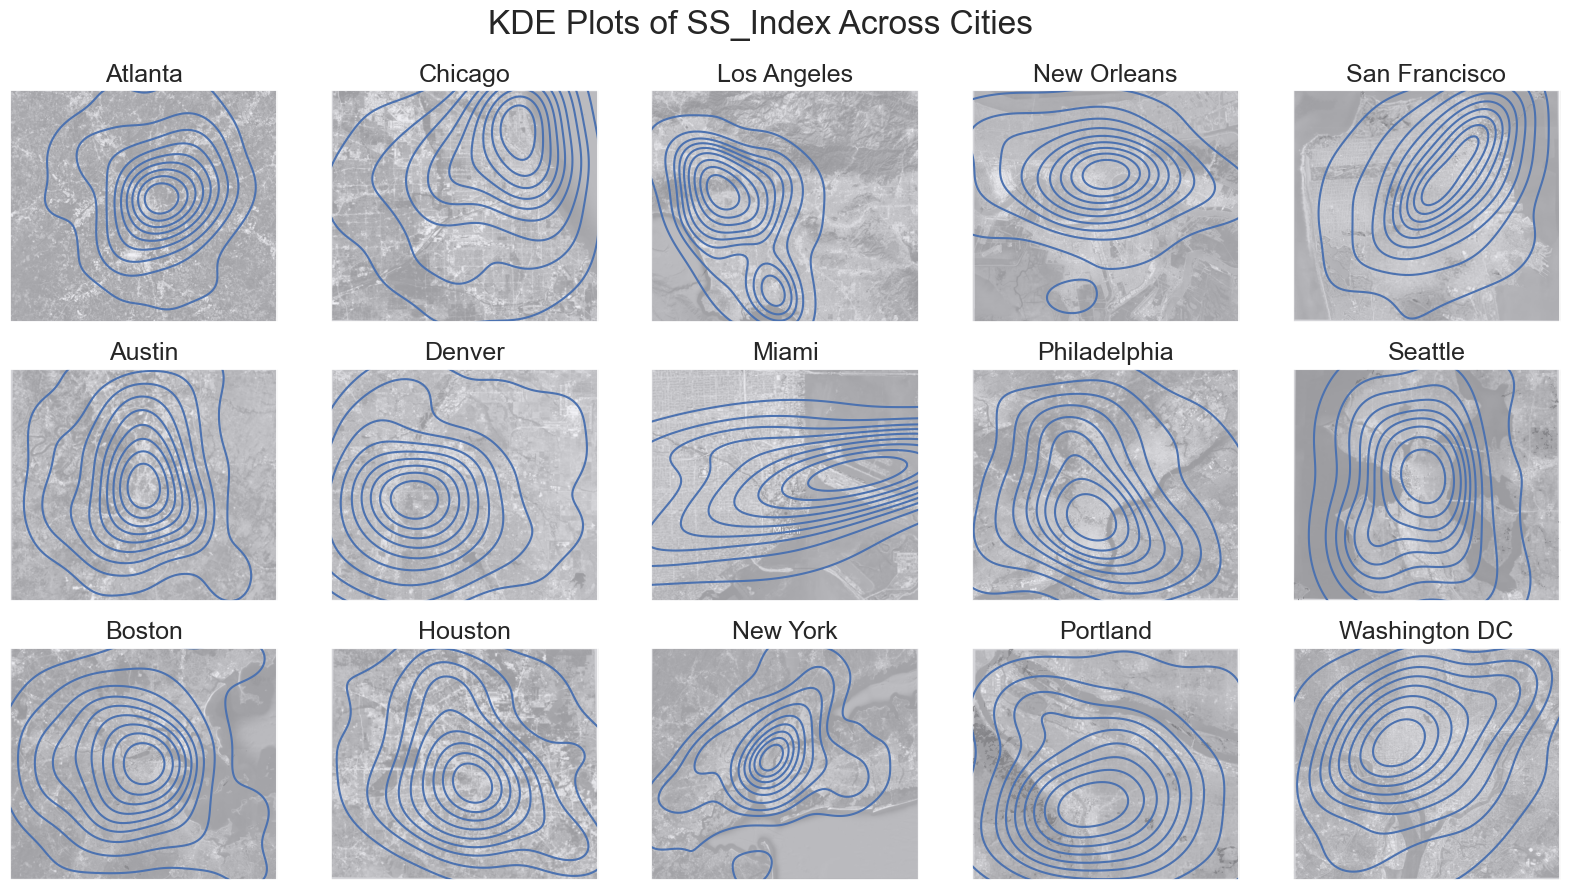

In [28]:
# so lets make our own version

# color_array = plt.get_cmap('copper_r')(range(256)) # color_array[:,-1] = np.array([np.power(x, 1/10) for x in np.arange(0, .5, step=(1/256)*.5)])
# copper_alpha = LinearSegmentedColormap.from_list(name='reds_alpha5',colors=color_array) # figure.suptitle("Concentration of Queer Communities Across the USA", fontsize=20)

sns.set_theme(style="darkgrid")

figure, axes = plt.subplots(3,5, figsize=(20, 10)); figure.subplots_adjust(top=0.9)

figure.suptitle("KDE Plots of SS_Index Across Cities", fontsize=24)

for i, city in enumerate(CITIES):
    ax = axes[i % 3][(i - i % 3)//3]
    
    sns.kdeplot(
        data=gb[(gb["long"] > city["pos"][0]) & (gb["long"] < city["pos"][1]) & (gb["lat"] > city["pos"][2]) & (gb["lat"] < city["pos"][3])],
        x="long", y="lat", weights="SS_Index", ax=ax#, fill=False, cmap=black, alpha=.3, ax=ax
    )
    
    ax.imshow(
        Image.open(f"images/{'-'.join(city['name'].lower().split())}.png").convert("LA"),
        aspect="auto", extent=city["pos"], alpha=.5
    )
    
    ax.set_title(city["name"], fontsize=18)
    
    ax.get_xaxis().set_ticks([]); ax.get_yaxis().set_ticks([]); ax.set_xlabel(None); ax.set_ylabel(None)